# Lab V

*DS422 - Machine Learning Driven Data Analysis I<br>
August 3, 2021*

# Necessary Libraries

In [232]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, LeakyReLU, BatchNormalization, Dense, InputLayer, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l2, l1, l1_l2
from tensorflow.keras.metrics import categorical_crossentropy

import tensorflow_datasets as tfds

# Configuring GPUs
These lines of codes might save you from some errors. Use it only when you have GPU.

In [233]:
devices = tf.config.experimental.list_physical_devices()
print(devices)
# tf.config.experimental.set_memory_growth(devices[0], True)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


# Getting Data
TensorFlow Data API

In [236]:
(train, test), info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

In [237]:
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='/home/musabbir/tensorflow_datasets/mnist/3.0.1',
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)


In [239]:
for i, data in enumerate(train):
    print(data[0].shape)
    print(data[1])
    if i == 1:
        break

(28, 28, 1)
tf.Tensor(4, shape=(), dtype=int64)
(28, 28, 1)
tf.Tensor(1, shape=(), dtype=int64)


2021-08-03 15:18:00.635703: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [240]:
def normalize(img, label):
    return tf.cast(img, tf.float32) / 255, label

In [241]:
batch_size = 64

In [242]:
train = train.map(normalize, num_parallel_calls=tf.data.experimental.AUTOTUNE)
train = train.cache()
train = train.shuffle(info.splits['train'].num_examples)
train = train.batch(batch_size)
train = train.prefetch(tf.data.experimental.AUTOTUNE)

In [243]:
test = test.map(normalize, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test = test.batch(128)
test = test.prefetch(tf.data.experimental.AUTOTUNE)

# Model I

In [245]:
model = Sequential([
    InputLayer(input_shape=(28,28,1)),
    Flatten(),
    Dense(units=32, activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=10, activation='softmax')
])

In [246]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_31 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_118 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_119 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_120 (Dense)            (None, 10)                170       
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
adam = Adam(
    learning_rate=0.001,
    beta_1=0.90,
    beta_2=0.999,
    epsilon=1e-8 
)

In [247]:
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [248]:
model.fit(
    train,
    validation_data=test,
    batch_size=batch_size,
    epochs=5,
    shuffle=True,
    verbose=2
)

Epoch 1/5
938/938 - 2s - loss: 0.3092 - accuracy: 0.9068 - val_loss: 0.1909 - val_accuracy: 0.9416
Epoch 2/5
938/938 - 1s - loss: 0.1675 - accuracy: 0.9517 - val_loss: 0.1593 - val_accuracy: 0.9499
Epoch 3/5
938/938 - 1s - loss: 0.1397 - accuracy: 0.9589 - val_loss: 0.1545 - val_accuracy: 0.9512
Epoch 4/5
938/938 - 1s - loss: 0.1239 - accuracy: 0.9639 - val_loss: 0.1395 - val_accuracy: 0.9577
Epoch 5/5
938/938 - 1s - loss: 0.1125 - accuracy: 0.9669 - val_loss: 0.1447 - val_accuracy: 0.9548


# Model II

In [249]:
model2 = Sequential([
    InputLayer(input_shape=(28,28,1)),
    Flatten(),
    Dense(units=32, activation='relu', kernel_initializer='he_normal'),
    Dense(units=16, kernel_initializer='he_normal'),
    LeakyReLU(alpha=0.2),
    Dense(units=10, activation='softmax', kernel_initializer='glorot_normal')
])

In [250]:
model2.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [251]:
model2.fit(
    train,
    validation_data=test,
    batch_size=10,
    epochs=5,
    shuffle=True,
    verbose=2
)

Epoch 1/5
938/938 - 1s - loss: 0.2818 - accuracy: 0.9158 - val_loss: 0.1790 - val_accuracy: 0.9439
Epoch 2/5
938/938 - 1s - loss: 0.1623 - accuracy: 0.9516 - val_loss: 0.1640 - val_accuracy: 0.9497
Epoch 3/5
938/938 - 1s - loss: 0.1335 - accuracy: 0.9597 - val_loss: 0.1374 - val_accuracy: 0.9560
Epoch 4/5
938/938 - 1s - loss: 0.1152 - accuracy: 0.9644 - val_loss: 0.1270 - val_accuracy: 0.9625
Epoch 5/5
938/938 - 1s - loss: 0.1026 - accuracy: 0.9683 - val_loss: 0.1214 - val_accuracy: 0.9622


# Model III

There won't be too much impact of batch normalization on such a shallow network. However, it may have positive impact in a very deep network. The parameters of batch normalization include gamma, beta, moving mean, and moving variance.

In [252]:
model3 = Sequential([
    InputLayer(input_shape=(28,28,1)),
    Flatten(),
    Dense(units=32, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Dense(units=16, kernel_initializer='he_normal'),
    LeakyReLU(alpha=0.2),
    BatchNormalization(),
    Dense(units=10, activation='softmax', kernel_initializer='glorot_normal')
])

In [253]:
model3.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_33 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_124 (Dense)            (None, 32)                25120     
_________________________________________________________________
batch_normalization_46 (Batc (None, 32)                128       
_________________________________________________________________
dense_125 (Dense)            (None, 16)                528       
_________________________________________________________________
leaky_re_lu_40 (LeakyReLU)   (None, 16)                0         
_________________________________________________________________
batch_normalization_47 (Batc (None, 16)                64        
_________________________________________________________________
dense_126 (Dense)            (None, 10)              

In [254]:
model3.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [255]:
model3.fit(
    train,
    validation_data=test,
    batch_size=10,
    epochs=5,
    shuffle=True,
    verbose=2
)

Epoch 1/5
938/938 - 1s - loss: 0.2857 - accuracy: 0.9178 - val_loss: 0.1666 - val_accuracy: 0.9511
Epoch 2/5
938/938 - 1s - loss: 0.1617 - accuracy: 0.9514 - val_loss: 0.1396 - val_accuracy: 0.9595
Epoch 3/5
938/938 - 1s - loss: 0.1335 - accuracy: 0.9604 - val_loss: 0.1306 - val_accuracy: 0.9618
Epoch 4/5
938/938 - 1s - loss: 0.1187 - accuracy: 0.9643 - val_loss: 0.1175 - val_accuracy: 0.9656
Epoch 5/5
938/938 - 1s - loss: 0.1061 - accuracy: 0.9676 - val_loss: 0.1184 - val_accuracy: 0.9637


# Model IV

In [256]:
model4 = Sequential([
    InputLayer(input_shape=(28,28,1)),
    Flatten(),
    Dense(units=32, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Dense(units=16, kernel_initializer='he_normal'),
    LeakyReLU(alpha=0.2),
    BatchNormalization(),
    Dense(units=10, activation='softmax', kernel_initializer='glorot_normal')
])

In [257]:
momentum = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [258]:
model4.compile(optimizer=momentum, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [262]:
model4.fit(
    train,
    validation_data=test,
    batch_size=10,
    epochs=5,
    shuffle=True,
    verbose=2
)

Epoch 1/5
938/938 - 1s - loss: 0.1185 - accuracy: 0.9640 - val_loss: 0.1248 - val_accuracy: 0.9624
Epoch 2/5
938/938 - 1s - loss: 0.1156 - accuracy: 0.9648 - val_loss: 0.1246 - val_accuracy: 0.9628
Epoch 3/5
938/938 - 1s - loss: 0.1112 - accuracy: 0.9668 - val_loss: 0.1263 - val_accuracy: 0.9624
Epoch 4/5
938/938 - 1s - loss: 0.1091 - accuracy: 0.9663 - val_loss: 0.1221 - val_accuracy: 0.9632
Epoch 5/5
938/938 - 1s - loss: 0.1054 - accuracy: 0.9679 - val_loss: 0.1223 - val_accuracy: 0.9635


# Model V

In [263]:
model5 = Sequential([
    InputLayer(input_shape=(28,28,1)),
    Flatten(),
    Dense(units=32, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Dense(units=16, kernel_initializer='he_normal'),
    LeakyReLU(alpha=0.2),
    BatchNormalization(),
    Dense(units=10, activation='softmax', kernel_initializer='glorot_normal')
])

In [264]:
rmsprop = RMSprop(
    learning_rate=0.001,
    rho=0.999
)

In [265]:
model5.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [266]:
model5.fit(
    train,
    validation_data=test,
    batch_size=10,
    epochs=5,
    shuffle=True,
    verbose=2
)

Epoch 1/5
938/938 - 2s - loss: 0.2756 - accuracy: 0.9192 - val_loss: 0.1704 - val_accuracy: 0.9488
Epoch 2/5
938/938 - 1s - loss: 0.1635 - accuracy: 0.9519 - val_loss: 0.1476 - val_accuracy: 0.9534
Epoch 3/5
938/938 - 1s - loss: 0.1396 - accuracy: 0.9584 - val_loss: 0.1465 - val_accuracy: 0.9533
Epoch 4/5
938/938 - 1s - loss: 0.1238 - accuracy: 0.9624 - val_loss: 0.1287 - val_accuracy: 0.9604
Epoch 5/5
938/938 - 1s - loss: 0.1129 - accuracy: 0.9657 - val_loss: 0.1171 - val_accuracy: 0.9636


# Model VI

In [267]:
model6 = Sequential([
    InputLayer(input_shape=(28,28,1)),
    Flatten(),
    Dense(units=512, kernel_initializer='he_normal'),
    LeakyReLU(alpha=0.2),
    BatchNormalization(),
    Dense(units=256, activation='selu', kernel_initializer='lecun_uniform'),
    Dense(units=128, kernel_initializer='he_normal'),
    LeakyReLU(alpha=0.2),
    BatchNormalization(),
    Dense(units=64, kernel_initializer='he_normal'),
    LeakyReLU(alpha=0.2),
    BatchNormalization(),
    Dense(units=32, kernel_initializer='he_normal'),
    LeakyReLU(alpha=0.2),
    BatchNormalization(),
    Dense(units=16, kernel_initializer='he_normal'),
    LeakyReLU(alpha=0.2),
    BatchNormalization(),
    Dense(units=10, activation='softmax', kernel_initializer='glorot_normal')
])

In [268]:
model6.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_36 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_133 (Dense)            (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_43 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
batch_normalization_52 (Batc (None, 512)               2048      
_________________________________________________________________
dense_134 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_135 (Dense)            (None, 128)               32896     
_________________________________________________________________
leaky_re_lu_44 (LeakyReLU)   (None, 128)             

In [269]:
model6.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [272]:
model6.fit(
    train,
    validation_data=test,
    batch_size=10,
    epochs=5,
    shuffle=True,
    verbose=2
)

Epoch 1/5
938/938 - 4s - loss: 0.0298 - accuracy: 0.9904 - val_loss: 0.0671 - val_accuracy: 0.9810
Epoch 2/5
938/938 - 4s - loss: 0.0279 - accuracy: 0.9911 - val_loss: 0.0729 - val_accuracy: 0.9795
Epoch 3/5
938/938 - 4s - loss: 0.0235 - accuracy: 0.9924 - val_loss: 0.0775 - val_accuracy: 0.9787
Epoch 4/5
938/938 - 5s - loss: 0.0239 - accuracy: 0.9924 - val_loss: 0.0698 - val_accuracy: 0.9808
Epoch 5/5
938/938 - 4s - loss: 0.0203 - accuracy: 0.9936 - val_loss: 0.0701 - val_accuracy: 0.9817


# Model VII

In [273]:
l2_regularizer = l2(0.01)

In [279]:
model7 = Sequential([
    InputLayer(input_shape=(28,28,1)),
    Flatten(),
    Dense(units=512, kernel_initializer='he_normal', kernel_regularizer=l2_regularizer),
    LeakyReLU(alpha=0.2),
    Dropout(0.2),
    BatchNormalization(),
    Dense(units=256, activation='selu', kernel_initializer='lecun_uniform', kernel_regularizer=l2_regularizer),
    Dense(units=128, kernel_initializer='he_normal', kernel_regularizer=l2_regularizer),
    LeakyReLU(alpha=0.2),
    Dropout(0.2),
    BatchNormalization(),
    Dense(units=64, kernel_initializer='he_normal', kernel_regularizer=l2_regularizer),
    LeakyReLU(alpha=0.2),
    Dropout(0.2),
    BatchNormalization(),
    Dense(units=32, kernel_initializer='he_normal', kernel_regularizer=l2_regularizer),
    LeakyReLU(alpha=0.2),
    Dropout(0.2),
    BatchNormalization(),
    Dense(units=16, kernel_initializer='he_normal', kernel_regularizer=l2_regularizer),
    LeakyReLU(alpha=0.2),
    BatchNormalization(),
    Dense(units=10, activation='softmax', kernel_initializer='glorot_normal')
])

In [280]:
model7.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [282]:
model7.fit(
    train,
    validation_data=test,
    batch_size=10,
    epochs=10,
    shuffle=True,
    verbose=2
)

Epoch 1/10
938/938 - 5s - loss: 0.6575 - accuracy: 0.9007 - val_loss: 0.5718 - val_accuracy: 0.9308
Epoch 2/10
938/938 - 6s - loss: 0.6393 - accuracy: 0.9047 - val_loss: 0.5339 - val_accuracy: 0.9316
Epoch 3/10
938/938 - 6s - loss: 0.6258 - accuracy: 0.9057 - val_loss: 0.5291 - val_accuracy: 0.9325
Epoch 4/10
938/938 - 6s - loss: 0.6149 - accuracy: 0.9058 - val_loss: 0.5503 - val_accuracy: 0.9192
Epoch 5/10
938/938 - 6s - loss: 0.5950 - accuracy: 0.9085 - val_loss: 0.5289 - val_accuracy: 0.9274
Epoch 6/10
938/938 - 6s - loss: 0.5937 - accuracy: 0.9093 - val_loss: 0.4572 - val_accuracy: 0.9456
Epoch 7/10
938/938 - 6s - loss: 0.5884 - accuracy: 0.9096 - val_loss: 0.4914 - val_accuracy: 0.9342
Epoch 8/10
938/938 - 6s - loss: 0.5768 - accuracy: 0.9115 - val_loss: 0.5800 - val_accuracy: 0.9065
Epoch 9/10
938/938 - 6s - loss: 0.5746 - accuracy: 0.9113 - val_loss: 0.4910 - val_accuracy: 0.9297
Epoch 10/10
938/938 - 7s - loss: 0.5666 - accuracy: 0.9121 - val_loss: 0.5092 - val_accuracy: 0.9309

In [287]:
labels = np.concatenate([y for x, y in test], axis=0)
cm = confusion_matrix(labels, model6.predict_classes(test))

Text(0.5, 57.777777777777786, 'Predicted Labels')

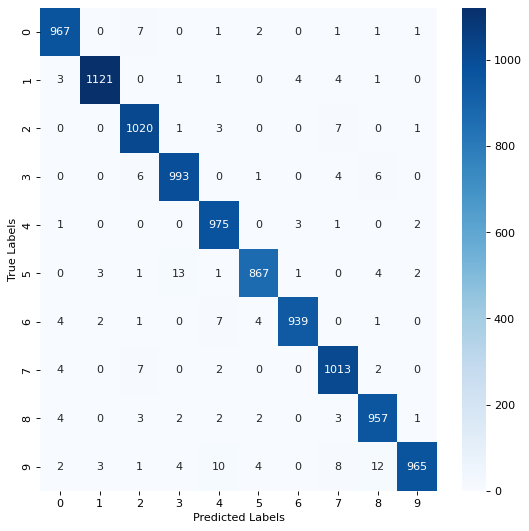

In [288]:
plt.figure(figsize=(8, 8), dpi=80)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='d')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

# Saving & Loading Models

In [293]:
import os

model6.save('mnist.h5')

In [294]:
loaded_model = keras.models.load_model('./mnist.h5')

In [295]:
loaded_model.evaluate(test)

79/79 [==============================] - 0s 3ms/step - loss: 0.0701 - accuracy: 0.9817


[0.07009829580783844, 0.9817000031471252]

In [296]:
model6.to_json()

'{"class_name": "Sequential", "config": {"name": "sequential_38", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 28, 28, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "input_38"}}, {"class_name": "Flatten", "config": {"name": "flatten_36", "trainable": true, "dtype": "float32", "data_format": "channels_last"}}, {"class_name": "Dense", "config": {"name": "dense_133", "trainable": true, "dtype": "float32", "units": 512, "activation": "linear", "use_bias": true, "kernel_initializer": {"class_name": "HeNormal", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "LeakyReLU", "config": {"name": "leaky_re_lu_43", "trainable": true, "dtype": "float32", "alpha": 0.20000000298023224}}, {"class_name": "BatchNormalization", "config": {"name": "batch_normalizatio

In [297]:
import json

In [298]:
json.dump()
json.load()

TypeError: dump() missing 2 required positional arguments: 'obj' and 'fp'

In [ ]:
model.to_yaml()